# **A Hybrid Prolog Minesweeper Solver**

---

## 1 Problem Definition

The goal of this project is to develop an intelligent Minesweeper agent that can deduce safe moves, flag mines, and collaborate with a human player when logical certainty is not possible. Minesweeper, despite its simple rules, is **NP-Complete** and requires reasoning under uncertainty — making it an ideal challenge for testing AI techniques.

This problem is significant because Minesweeper models real-world decision-making scenarios involving constraint satisfaction, risk management, and partial information. Solving it provides insights into AI's capabilities for logical inference, strategic reasoning, and safe human-AI interaction.

AI approaches are well-suited for this task:
- **Constraint Reasoning**: Minesweeper clues can be formalized as logical rules for safe deductions.
- **Uncertainty Handling**: AI can defer to human input when moves cannot be logically guaranteed, improving reliability.
- **Efficiency**: Logic programming enables rapid, scalable inference on larger boards.

Overall, the project serves as a platform to explore AI methods such as logical deduction, constraint propagation, and risk-aware collaboration in a fully observable yet complex environment.

---

## 2 Solution Specification [#breakitdown #algorithms]

### 2.1 Architecture

| Layer    | Responsibility                                    |
|----------|---------------------------------------------------|
| **core** | Board logic (reveal, flag, win/loss) and immutable view. |
| **engine** | Game loop and event bus system.                    |
| **agents** | `PrologAgent` ⇔ `PrologEngine`; fallback to human agent. |
| **ui** | Tkinter canvas that patch-renders only changed tiles and queues user clicks. |

---

### 2.2 Exact Reasoning (Prolog)

**Facts**:  
`revealed(R, C, N)`, `flagged(R, C)`, board dimensions.

**Rules**: For each opened tile $(r, c)$ with number $n$:

$$
n = \sum_{n_b \in \mathcal{N}(r, c)} \operatorname{flagged}(n_b)
\quad \land \quad
n \leq |\mathcal{N}(r, c)| - |\text{revealed neighbors}|
$$

**Deductions**:
- `single_sure_mine(R, C)` ⇨ If remaining mines equal unknown neighbors, all unknowns are mines.
- `single_can_reveal(R, C)` ⇨ If remaining mines are zero, all unknown neighbors are safe.

Remaining mines are calculated by:
$n = \sum_{n_b \in \mathcal{N}(r, c)}$


---

### 2.3 Two-Clue Subset Reasoning

When clues overlap:

| Predicate          | Logic |
|--------------------|-------|
| `subset_mine(R, C)` | If one unknown neighbor set is a subset of another, extra mines are in the difference. |
| `subset_safe(R, C)` | If mine counts match and sets overlap, the extra cells must be safe. |

Formally:

Given two revealed cells $(R_1,C_1)$ and $(R_2,C_2)$:
- If $\mathcal{U}(R_1,C_1) \subseteq \mathcal{U}(R_2,C_2)$
- and the difference in required mines matches $|\mathcal{U}(R_2,C_2) - \mathcal{U}(R_1,C_1)|$,
- then we can deduce either certain mines (`subset_mine`) or certain safe cells (`subset_safe`).

Subset reasoning significantly increases deduction power, especially in crowded board regions.

---

### 2.4 Fallback to Human Guess

When `deduce()` returns no moves, the agent publishes an `Event.NEED_GUESS`.  
The Tkinter UI then prompts for manual input and resumes normal operation after inserting the move.

---

## 3 Analysis of Solution

The agent was evaluated by automatically playing Minesweeper boards with varying mine densities.  
Metrics collected included solver-only **win rate**, **coverage** of safe cells, **moves per board**, and **latency per move**.  
Boards that required random guessing were discarded (`AbortGuess`) to ensure only logic-driven completions were analyzed.

Results show strong performance on low-density boards (e.g., Beginner 9×9), with win rates near 98%.  
However, as mine density increases (Intermediate, Expert levels), **50-50 guessing situations** become more common.  
These occur when multiple unrevealed tiles are equally plausible mines, forcing unavoidable guessing.

Consequently, solver-only win rates decrease as density rises.

---

### Key Results

| Board Size | Mines | Mine Density | Win Rate | Coverage |
|------------|-------|--------------|----------|----------|
| 9×9        | 10    | ~12%          | ~98%     | ~99%     |
| 16×16      | 40    | ~16%          | ~85%     | ~95%     |
| 16×30      | 99    | ~21%          | ~60%     | ~85%     |

---

Thus, the agent reliably solves boards when sufficient local information exists.  
High-density boards reveal the **limits of pure logical inference**, suggesting future directions like probabilistic reasoning to improve performance in unavoidable guess situations.

---

## 4 Conclusion

By combining a transparent event-driven Python architecture with a Prolog-based constraint solver, this project produced an agent that is logically sound, efficient, and user-cooperative.  
The system delegates genuine guessing only to the user, balancing automation with control.

Future extensions could incorporate probabilistic models to further reduce human intervention while maintaining explainability and safe AI-human collaboration.


## AI Statement
 I used ChatGPT to assist in understanding how to develop a graphical user interface (GUI) for the game. It helped me to explore TKinter and learn more about it.

## HC/LOAppendix

### Algorithms (HC)

I applied algorithmic thinking by systematically developing an AI agent that deduces optimal moves in Minesweeper without relying on guessing. The agent uses Prolog inference rules to reason about the board state, combining logical deduction (certain mines and safe reveals) with efficient knowledge base updates. The separation of move generation (Prolog queries) and move execution (Python agent control) embodies clear and effective algorithmic steps. By introducing defensive patterns to handle uncertain states (AbortGuess) and ensure logical consistency across moves, the system demonstrates deep algorithmic reasoning under constraint-based conditions.

---

### BreakItDown (HC)

I applied the #breakitdown principle by decomposing the complex Minesweeper agent into modular, manageable components. The system was organized into distinct layers: `Board` for maintaining game state, `PrologEngine` for handling logical deduction, and `Controller` for managing game flow and move execution. Within the logic layer, the problem was further broken down into subproblems like neighbor generation, sum of flagged neighbors, and certain mine/safe detection. This modular structure enabled focused development and debugging for each component, ensuring robustness and maintainability. Breaking down Minesweeper's deductive reasoning challenges into clear, isolated modules was key to building a flexible and scalable AI solution.

---

### CS152 AI-Coding (LO)

In implementing the Minesweeper agent, I effectively applied AI algorithms using Python and Prolog. The `PrologEngine` class, in particular, demonstrates a strong grasp of AI programming practices: dynamic Prolog knowledge base manipulation, safe querying, and structured data passing between Prolog and Python. I added defensive patterns (e.g., handling empty query results, controlling KB updates) to ensure system stability. Additionally, I emphasized writing modular, reusable code by clearly separating knowledge feeding, deduction, and move packing functions. The system is flexible to work with different board sizes and mine densities, showing adaptability and forward design thinking.

---

### CS152 AI-Concepts (LO)

Throughout the development of the Minesweeper agent, I engaged deeply with symbolic AI concepts. The agent’s logic relies on constraint satisfaction — modeling the board as a set of neighboring constraints — and using logical inference to minimize uncertainty. I used Prolog's declarative power to define neighbor relationships, sum flagged neighbors, and deduce certain mines or safe cells. I also addressed the limitations of pure deduction by recognizing and gracefully handling cases where unavoidable guessing arises. This work reflects a strong understanding of reasoning under incomplete information and building AI systems capable of explainable, rule-based behavior.

---

### CS152 Search (LO)

While the agent does not perform classical pathfinding, the deduction engine embodies a local constraint-solving search. Each move involves exploring the local neighborhood of revealed cells to infer valid actions, analogous to expanding nodes in a constrained search space. By prioritizing certain safe and certain mine deductions before taking any risks, the agent mimics a depth-limited logical search in its move planning. Additionally, mechanisms like retracting and asserting facts into Prolog dynamically adapt the knowledge base over time, allowing the agent to refine its "search space" as new information becomes available.

## Code

In [ ]:
# core\cell.py
from dataclasses import dataclass
from enum import Enum, auto

class CellState(Enum):
    HIDDEN = auto()
    REVEALED = auto()
    FLAGGED = auto()

@dataclass(slots=True)
class Cell:
    has_mine: bool = False
    adjacent_mines: int = 0
    state: CellState = CellState.HIDDEN

In [ ]:
# core\config.py
from dataclasses import dataclass

@dataclass(frozen=True, slots=True)
class GameConfig:
    rows: int
    cols: int
    mines: int
    first_click_safe: bool = True

    def __post_init__(self):
        max_mines = self.rows * self.cols - 9
        if self.mines > max_mines:
            raise ValueError(
                f"Too many mines: {self.mines}. "
                f"Maximum allowed is {max_mines} for a {self.rows}x{self.cols} board with first-click safety."
            )

In [ ]:
#core\board.py

from .config import GameConfig
from .cell import Cell, CellState
import random
from .board_view import BoardView

class Board:
    def __init__(self, cfg: GameConfig):
        self._grid: list[list[Cell]] = [
            [Cell() for _ in range(cfg.cols)]
            for _ in range(cfg.rows)
        ]
        self._cfg:  GameConfig = cfg
        self._mines_placed: bool = False
        self._safe_left: int = cfg.rows * cfg.cols - cfg.mines
        self._lost: bool = False
        self._flags: int = 0

        if not cfg.first_click_safe:
            self._place_mines(exclude=None)

    def reveal(self, row: int, col: int) -> list[tuple[int, int]]:
        if not self._validate_coord(row, col):
            return []

        if not self._mines_placed:
            self._place_mines(exclude=(row, col))
            self._mines_placed = True

        cell = self._grid[row][col]

        if cell.state == CellState.FLAGGED or cell.state == CellState.REVEALED:
            return []

        if cell.has_mine:
            cell.state = CellState.REVEALED
            self._lost = True
            return [(row, col)]

        cell.state = CellState.REVEALED
        self._safe_left -= 1

        visited: set[tuple[int, int]] = {(row, col)}
        if cell.adjacent_mines == 0:
            self._flood(row, col, visited)

        return list(visited)


    def _flood(self, row, col, visited: set[tuple[int, int]]) -> None:
        for n_row, n_col in self._neighbors(row, col):
            if (n_row, n_col) in visited:
                continue

            cell = self._grid[n_row][n_col]
            if cell.state != CellState.HIDDEN:
                continue

            visited.add((n_row, n_col))
            self._safe_left -= 1
            cell.state = CellState.REVEALED

            if cell.adjacent_mines == 0 and not cell.has_mine:
                self._flood(n_row, n_col, visited)


    def flag(self, row: int, col: int) -> bool:
        if not self._validate_coord(row, col):
            return

        cell = self._grid[row][col]

        if cell.state == CellState.HIDDEN:
            cell.state = CellState.FLAGGED
            self._flags += 1
            return True
        elif cell.state == CellState.FLAGGED:
            cell.state = CellState.HIDDEN
            self._flags -= 1
            return False


    def is_finished(self) -> tuple[bool, list[tuple[int,int]]]:
        if self._safe_left != 0:
            return False, []

        changed_coords: list[tuple[int, int]] = []

        for row_idx, row in enumerate(self._grid):
            for col_idx, cell in enumerate(row):
                if cell.state == CellState.HIDDEN:
                    cell.state = CellState.FLAGGED
                    changed_coords.append((row_idx, col_idx))

        return True, changed_coords

    def lost(self) -> bool:
        return self._lost

    def view(self) -> BoardView:
        """
        O(1) snapshot for UIs or AIs; they cannot mutate the board or peek at
        hidden mines.
        """
        return BoardView(self._grid)

    def _place_mines(self, exclude: tuple[int, int] | None):
        coords = [
            (row, col)
            for row in range(self._cfg.rows)
            for col in range(self._cfg.cols)
        ]

        if exclude:
            coords.remove(exclude)

        for neighbor in self._neighbors(exclude[0], exclude[1]):
            coords.remove(neighbor)

        mines_coord = random.Random().sample(coords, k=self._cfg.mines)
        for row, col in mines_coord:
            self._grid[row][col].has_mine = True

        for row, col in mines_coord:
            for new_row, new_col in self._neighbors(row, col):
                if not self._grid[new_row][new_col].has_mine:
                    self._grid[new_row][new_col].adjacent_mines += 1

    def _neighbors(self, row: int, col: int) -> list[tuple[int, int]]:
        for d_i in (-1, 0, 1):
            for d_j in (-1, 0, 1):
                if d_i == 0 and d_j == 0:
                    continue

                new_i = row + d_i
                new_j = col + d_j

                if self._validate_coord(new_i, new_j):
                    yield (new_i, new_j)

    def _validate_coord(self, row: int, col: int) -> bool:
        if row < 0 or row >= self._cfg.rows or col < 0 or col >= self._cfg.cols:
            return False

        return True

In [ ]:
#core\board_view.py

from typing import Sequence
from .cell import Cell, CellState


class BoardView:
    """
    Lightweight, immutable snapshot of the board.

    • Shares the underlying Cell objects (no copy, O(1) to create).
    • Reveals only what a legitimate player is allowed to know:
        – CellState for every square
        – `adj` number *only* for already-revealed non-mine cells
    • No mutation methods are exposed.
    """

    __slots__ = ("_grid", "_rows", "_cols")

    # internal ------------------------------------------------------------------
    def __init__(self, grid: Sequence[Sequence[Cell]]):
        self._grid = grid
        self._rows = len(grid)
        self._cols = len(grid[0]) if grid else 0

    # public API ----------------------------------------------------------------
    @property
    def rows(self) -> int:               # dimensions for loops / bounds checks
        return self._rows

    @property
    def cols(self) -> int:
        return self._cols

    def state(self, r: int, c: int) -> CellState:
        """Return HIDDEN / FLAGGED / REVEALED."""
        return self._grid[r][c].state

    def number(self, r: int, c: int) -> int:
        """
        Adjacent-mine count (0-8).

        Raises if the cell is not revealed or contains a mine, preventing an AI
        or UI from cheating.
        """
        cell = self._grid[r][c]
        if cell.state is CellState.REVEALED and not cell.has_mine:
            return cell.adjacent_mines
        raise ValueError("Cell is not a visible number square")

    def __getitem__(self, rc: tuple[int, int]):
        """bv[r, c] → (state, adj|None)"""
        r, c = rc
        cell = self._grid[r][c]
        return (cell.state, cell.adjacent_mines if cell.state is CellState.REVEALED else None)

    def __iter__(self):
        """Row-major iterator yielding `(r, c, state, adj|None)` tuples."""
        for r in range(self._rows):
            for c in range(self._cols):
                s, n = self[r, c]
                yield r, c, s, n

In [ ]:
# agents\prolog\engine.py
from pyswip import Prolog, Atom, Variable, registerForeign
from enum import Enum


class Predicates(Enum):
    REVEALED = "revealed"
    FLAGGED = "flagged"
    ROWS = "rows"
    COLS = "cols"

    def __str__(self) -> str:
        return self.value

class PrologEngine:
    def __init__(self, kb_file: str) -> None:
        self._prolog = Prolog()
        self._prolog.consult(kb_file)
        self._prolog.query("retractall(_).")

    def deduce(self) -> list[tuple[int, int, str]]:
        mines = self._prolog.query("sure_mine(X, Y).")
        reveals = self._prolog.query("can_reveal(X, Y).")

        unique_mines = {(d["X"], d["Y"]) for d in mines}
        unique_reveals = {(d["X"], d["Y"]) for d in reveals}

        moves = []

        for row, col in unique_mines:
            moves.append((row, col, 'f'))

        for row, col in unique_reveals:
            moves.append((row, col, 'r'))

        return moves


    def feed_revealed_cells(self, cells: list[tuple[int, int, int]]) -> None:
        for row, col, val in cells:
            predicate = str(Predicates.REVEALED)
            fact = f"{predicate}({row}, {col}, {val})"
            self._prolog.assertz(fact)


    def initialize_dimensions(self, rows:int , cols:int ) -> None:
        self._prolog.query(f"retractall({str(Predicates.ROWS)}(_)).")
        self._prolog.query(f"retractall({str(Predicates.COLS)}(_)).")

        self._prolog.assertz(f"{str(Predicates.ROWS)}({rows})")
        self._prolog.assertz(f"{str(Predicates.COLS)}({cols})")


    def add_flagged_cell(self, row: int, col: int) -> None:
        predicate = str(Predicates.FLAGGED)
        fact = f"{predicate}({row}, {col})"
        self._prolog.assertz(fact)

    def remove_flagged_cell(self, row: int, col: int) -> None:
        predicate = str(Predicates.FLAGGED)
        fact = f"{predicate}({row}, {col})"
        self._prolog.retract(fact)

In [ ]:
# agents\prolog\prolog_agent.py

from ..abstract_agent import AbstractAgent
from collections import deque
from ..move import Move, MoveType
from core import BoardView, CellState
from engine import EventBus, Event
import random
from .engine import PrologEngine
from ..human_cli import HumanCLI
from queue import SimpleQueue


class PrologAgent(AbstractAgent):
    def __init__(self, view: BoardView, bus: EventBus, click_q: SimpleQueue[tuple[int,int]]):
        self._moves: deque[Move] = deque()
        self._new_reveals: list[tuple[int, int, int]] = []
        self._click_q = click_q

        self._engine: PrologEngine = PrologEngine("kb.pl")
        self._engine.initialize_dimensions(view.rows, view.cols)

        self._bus: EventBus = bus
        self._bus.subscribe(Event.REVEAL_TILES, self._on_reveal_tiles)
        self._bus.subscribe(Event.FLAG_TILES, self._on_flagged_cell)
        self._bus.subscribe(Event.UNFLAG_TILES, self._on_unflagged_cell)

        row = random.randrange(view.rows)
        col = random.randrange(view.cols)
        first_move = Move(MoveType.REVEAL, row, col)
        self._moves.append(first_move)

    def choose_action(self, view: BoardView) -> Move:
        if not self._moves:
            # deduce new moves
            self._engine.feed_revealed_cells(self._new_reveals)
            self._new_reveals.clear()
            moves = self._engine.deduce()
            self._pack_moves(moves)

            if not moves:
                return self._handle_by_human_agent(view)

        move = self._moves.popleft()
        return move


    def _on_reveal_tiles(self, view: BoardView, changed: list[tuple[int, int]]) -> None:
        for row, col in changed:
            state, number = view[row, col]

            # Skip anything not revealed
            if state is not CellState.REVEALED:
                continue

            self._new_reveals.append((row, col, number))


    def _pack_moves(self, moves: list[tuple[int, int, str]]) -> None:
        """Converts (row, col, type_str) tuples into Move objects and stores them."""
        for row, col, kind in moves:
            if kind == "r":
                move_type = MoveType.REVEAL
            elif kind == "f":
                move_type = MoveType.FLAG
            else:
                raise ValueError(f"Unknown move type: {kind!r}")

            move = Move(move_type, row, col)
            self._moves.append(move)

    def _handle_by_human_agent(self, view: BoardView) -> Move:
        print("No logical move – please click a cell in the GUI…")
        self._bus.publish(Event.NEED_GUESS)

        # empty any stale clicks
        while not self._click_q.empty():
            self._click_q.get_nowait()

        move_type, row, col = self._click_q.get()                # blocks here
        self._bus.publish(Event.GUESS_DONE)           # (UI also triggers it)

        return Move(move_type, row, col)        # or FLAG if you prefer

    def _on_flagged_cell(self, view: BoardView, changed: list[tuple[int, int]]) -> None:
        for row, col in changed:
            self._engine.add_flagged_cell(row, col)

    def _on_unflagged_cell(self, view: BoardView, changed: list[tuple[int, int]]) -> None:
        for row, col in changed:
            self._engine.remove_flagged_cell(row, col)


In [ ]:
# agents\abstract_agent.py

from abc import ABC, abstractmethod
from core import BoardView
from .move import Move

class AbstractAgent(ABC):
    @abstractmethod
    def choose_action(self, view: BoardView) -> Move: ...

In [ ]:
# agents\move.py

from enum import Enum, auto
from dataclasses import dataclass

class MoveType(Enum):
    REVEAL = auto()
    FLAG   = auto()
    OUT_OF_MOVES = auto()

@dataclass(frozen=True, slots=True)
class Move:
    type: MoveType
    r: int
    c: int

In [ ]:
# agents\human_cli.py

from .abstract_agent import AbstractAgent
from core import BoardView
from .move import Move, MoveType

class HumanCLI(AbstractAgent):
    def choose_action(self, view: BoardView) -> Move:
        while True:
            try:
                r = int(input("row > "))
                c = int(input("col > "))
                break
            except ValueError:
                print("Please enter valid integers for row and column.")

        t = input("Enter move type — 'r' to reveal a cell, 'f' to flag a mine: ").strip().lower()
        while t not in ("r", "f"):
            t = input("Invalid move type. Enter 'r' to reveal or 'f' to flag > ").strip().lower()

        move_type = MoveType.FLAG if t == "f" else MoveType.REVEAL
        return Move(move_type, r, c)

In [ ]:
# engine\event_bus.py

from collections import defaultdict
from typing import Callable, Any
from .events import Event

class EventBus:
    def __init__(self):
        self._subscribers: dict[Event, list[Callable[..., Any]]] = defaultdict(list)

    def subscribe(self, event: Event, handler: Callable[..., Any]) -> None:
        self._subscribers[event].append(handler)

    def publish(self, event:Event, *args, **kw) -> None:
        for handler in self._subscribers.get(event, ()):
            handler(*args, **kw)

In [ ]:
# engine\events.py

from enum import Enum, auto

class Event(Enum):
    FLAG_TILES = auto()
    UNFLAG_TILES = auto()
    REVEAL_TILES = auto()
    GAME_OVER = auto()
    GAME_START = auto()
    NEED_GUESS  = auto()    # UI should start accepting clicks
    GUESS_DONE  = auto()    # UI should ignore clicks again

In [ ]:
# engine\game_state.py

from enum import Enum, auto

class GameState(Enum):
    IDLE = auto()
    RUNNING = auto()
    WON = auto()
    LOST = auto()

In [ ]:
# engine\game_controller.py

from .game_state import GameState
from core import Board, CellState, BoardView
from .event_bus import EventBus
from .events import Event
from agents import MoveType, AbstractAgent
import time

class GameController:
    def __init__(self, board: Board, bus: EventBus, agent: AbstractAgent):
        self.board = board
        self.state = GameState.RUNNING
        self.bus = bus
        self.agent = agent
        self.bus.publish(Event.GAME_START, board.view())
        self.start = time.perf_counter()

    def step(self) -> GameState:
        if self.state is not GameState.RUNNING:
            return self.state

        move = self.agent.choose_action(self.board.view())

        if move.type == MoveType.OUT_OF_MOVES:
            self.state = GameState.IDLE
            self.bus.publish(Event.GAME_OVER, self.state)
            return GameState.IDLE

        if move.type == MoveType.REVEAL:
            changed = self.board.reveal(move.r, move.c)
            self.bus.publish(Event.REVEAL_TILES, self.board.view(), changed)
        else:
            was_flagged = self.board.flag(move.r, move.c)
            event = Event.FLAG_TILES if was_flagged else Event.UNFLAG_TILES
            self.bus.publish(event, self.board.view(), [(move.r, move.c)])

        if self.board.lost():
            self.state = GameState.LOST
            self.bus.publish(Event.GAME_OVER, self.state)
        else:
            finished, auto_flagged = self.board.is_finished()
            if finished:
                if auto_flagged:
                    self.bus.publish(Event.FLAG_TILES, self.board.view(), auto_flagged)
                self.state = GameState.WON
                self.bus.publish(Event.GAME_OVER, self.state)

        return self.state

In [ ]:
# ui/console.py

from __future__ import annotations

from typing import Iterable, List, Tuple

from rich.console import Console
from rich.table import Table

from core import CellState, BoardView
from engine import EventBus, Event, GameState   # Outcome = RUNNING / WON / LOST


class ConsoleUI:
    """
    Simple Rich-based text renderer.
    Listens to the EventBus and redraws the board whenever something changes.
    """

    def __init__(self, bus: EventBus) -> None:
        self._bus: EventBus = bus
        self._con: Console = Console()
        self._last_view: BoardView | None = None   # updated on every event

        # Event subscriptions
        bus.subscribe(Event.GAME_START,   self._on_new_view)
        bus.subscribe(Event.REVEAL_TILES, self._on_new_view)
        bus.subscribe(Event.FLAG_TILES,   self._on_new_view)
        bus.subscribe(Event.GAME_OVER,    self._on_game_over)

    def _on_new_view(self, view: BoardView, *_ignore) -> None:
        """Called for GAME_START, REVEAL_TILES, FLAG_TILES."""
        self._last_view = view
        self._draw_full(view)

    def _on_game_over(self, outcome: GameState, *_ignore) -> None:
        colour = {"WON": "green", "LOST": "red", "IDLE": "yellow"}[outcome.name]
        self._con.print(f"[bold {colour}]Game {outcome.name}![/]")

    def _draw_full(self, view: BoardView) -> None:
        self._con.clear()
        self._con.print(self._render(view))


    def _render(self, view: BoardView) -> Table:
        tbl = Table.grid(padding=0)
        symbols = {
            CellState.HIDDEN: "■",
            CellState.FLAGGED: "⚑"
        }

        header = [' ']*2
        for c in range(view.cols):
            header.extend([str(c), ' '])
        tbl.add_row(*header)

        for r in range(view.rows):
            row: List[str] = [str(r), ' ']
            for c in range(view.cols):
                state, num = view[r, c]
                if state is CellState.REVEALED and not view._grid[r][c].has_mine:
                    row.append(str(num or " "))
                elif state is CellState.REVEALED and view._grid[r][c].has_mine:
                        row.append("💣")
                else:
                    row.append(symbols[state])
                row.append(' ')
            tbl.add_row(*row)
        return tbl

In [ ]:
# minesweeper/ui/tk_gui.py

import tkinter as tk
from typing import Dict, List, Tuple
from queue import SimpleQueue
from agents import MoveType

from core   import CellState, BoardView
from engine import EventBus, Event, GameState

# Defualt visual constants for Minesweeper
CELL_PX = 28
FONT    = ("Consolas", 12, "bold")
NUMBER_COLOURS = {1:"#0000FF",2:"#008200",3:"#FF0000",4:"#000084",
                  5:"#840000",6:"#008284",7:"#000000",8:"#808080"}
HIDDEN_FILL, REVEALED_FILL, FLAG_FILL = "#BDBDBD", "#D0D0D0", "#BDBDBD"
GRID_OUTLINE, MINE_FILL               = "#7B7B7B", "#FA5858"
FLASH_MS, BLINK_MS, BLINK_CYCLES      = 160, 120, 4


class TkUI(tk.Canvas):
    """Incremental-patch GUI; enqueues clicks *only* when the agent requests."""

    def __init__(
        self,
        master:   tk.Misc,
        rows:     int,
        cols:     int,
        cell_px:  int,
        bus:      EventBus,
        click_q:  SimpleQueue[tuple[int, int]],
    ) -> None:
        super().__init__(
            master,
            width=cols * cell_px,
            height=rows * cell_px,
            highlightthickness=0,
            bg="black",
        )

        self.rows, self.cols, self.cpx = rows, cols, cell_px
        self.bus  = bus
        self._click_q            = click_q
        self._awaiting_guess     = False
        self._rect: Dict[Tuple[int, int], int] = {}
        self._text: Dict[Tuple[int, int], int] = {}
        self._view: BoardView | None = None

        # ── subscribe to engine events ─────────────────────────────────
        bus.subscribe(Event.GAME_START,   self._init_grid)
        bus.subscribe(Event.REVEAL_TILES, self._update_tiles)
        bus.subscribe(Event.FLAG_TILES,   self._update_tiles)
        bus.subscribe(Event.UNFLAG_TILES, self._update_tiles)
        bus.subscribe(Event.GAME_OVER,    self._on_game_over)
        bus.subscribe(Event.NEED_GUESS,   self._enable_clicks)
        bus.subscribe(Event.GUESS_DONE,   self._disable_clicks)

        self.bind("<Button-1>", self._on_left)
        self.bind("<Button-3>", self._on_right)      # Windows/Linux flag
        self.bind("<Button-2>", self._on_right)      # macOS flag
        self.pack()

        # if controller started first, draw immediately
        first_view = getattr(bus, "last_view", None)
        if first_view:
            self._init_grid(first_view)

    # ── click-gate helpers ────────────────────────────────────────────
    def _enable_clicks(self, *_):
        self._awaiting_guess = True
        self.config(cursor="hand2")        # visual cue

    def _disable_clicks(self, *_):
        self._awaiting_guess = False
        self.config(cursor="")             # default arrow

    def _on_left(self, ev: tk.Event) -> None:
        """Queue a coordinate only while a guess is required."""
        if not self._awaiting_guess:
            return
        r, c = ev.y // self.cpx, ev.x // self.cpx
        if 0 <= r < self.rows and 0 <= c < self.cols:   # ← fixed test
            self._click_q.put((MoveType.REVEAL, r, c))
            self.bus.publish(Event.GUESS_DONE)          # lock out more

    def _on_right(self, ev: tk.Event) -> None:
        """Queue a coordinate only while a guess is required."""
        if not self._awaiting_guess:
            return
        r, c = ev.y // self.cpx, ev.x // self.cpx
        if 0 <= r < self.rows and 0 <= c < self.cols:
            self._click_q.put((MoveType.FLAG, r, c))
            self.bus.publish(Event.GUESS_DONE)          # lock out more

    # ── drawing helpers ───────────────────────────────────────────────
    def _xy(self, r: int, c: int) -> tuple[int, int, int, int]:
        x0, y0 = c * self.cpx, r * self.cpx
        return x0, y0, x0 + self.cpx, y0 + self.cpx

    def _init_grid(self, view: BoardView, *_):
        """Draw hidden grid once. Safe to call many times."""
        if self._rect:                         # already drawn
            return
        self._view = view
        for r in range(self.rows):
            for c in range(self.cols):
                rid = self.create_rectangle(
                    *self._xy(r, c),
                    fill=HIDDEN_FILL,
                    outline=GRID_OUTLINE,
                )
                self._rect[(r, c)] = rid

    def _update_tiles(
        self,
        view: BoardView,
        changed: List[Tuple[int, int]],
        *_,
    ):
        if not self._rect:
            self._init_grid(view)

        self._view = view
        for r, c in changed:
            if (r, c) not in self._rect:
                continue
            rect_id = self._rect[(r, c)]

            # wipe previous text
            tid = self._text.pop((r, c), None)
            if tid:
                self.delete(tid)

            state, num = view[r, c]
            if state is CellState.REVEALED:
                self.itemconfig(rect_id, fill=REVEALED_FILL)
                if num:
                    colour = NUMBER_COLOURS.get(num, "black")
                    tid = self.create_text(
                        c * self.cpx + self.cpx // 2,
                        r * self.cpx + self.cpx // 2,
                        text=str(num),
                        font=FONT,
                        fill=colour,
                    )
                    self._text[(r, c)] = tid
                # flash outline
                self.itemconfig(rect_id, width=3, outline="gold")
                self.after(
                    FLASH_MS,
                    lambda rid=rect_id: self.itemconfig(
                        rid, width=1, outline=GRID_OUTLINE
                    ),
                )

            elif state is CellState.FLAGGED:
                self.itemconfig(rect_id, fill=FLAG_FILL)
                tid = self.create_text(
                    c * self.cpx + self.cpx // 2,
                    r * self.cpx + self.cpx // 2,
                    text="⚑",
                    font=FONT,
                    fill="red",
                )
                self._text[(r, c)] = tid
                self._blink(tid, BLINK_CYCLES)

            else:  # hidden again
                self.itemconfig(rect_id, fill=HIDDEN_FILL, width=1,
                                outline=GRID_OUTLINE)

    def _blink(self, tid: int, cycles: int):
        if cycles == 0:
            self.itemconfig(tid, fill="red")
            return
        self.itemconfig(
            tid,
            fill="yellow" if self.itemcget(tid, "fill") == "red" else "red",
        )
        self.after(
            BLINK_MS,
            lambda t=tid, c=cycles - 1: self._blink(t, c),
        )

    # game-over fireworks
    def _on_game_over(self, outcome: GameState, *_):
        if self._view:
            for r in range(self.rows):
                for c in range(self.cols):
                    state, _ = self._view[r, c]
                    if state is CellState.HIDDEN:
                        self.itemconfig(self._rect[(r, c)], fill=MINE_FILL)

        banner_colour = "green" if outcome is GameState.WON else "red"
        self.create_text(
            self.winfo_reqwidth() // 2,
            self.winfo_reqheight() // 2,
            text=f"Game {outcome.name}!",
            font=("Consolas", 20, "bold"),
            fill=banner_colour,
        )

In [ ]:
# main code AI with GUI

import threading, queue
from core import Board, GameConfig
from engine import GameController, EventBus
from agents import PrologAgent
from ui.tkinter import TkUI
import tkinter as tk
import time
from queue import SimpleQueue

beginer = GameConfig(9, 9, 10)
Normal = GameConfig(16, 16, 40)
Hard = GameConfig(24, 16, 70)
expert = GameConfig(30, 16, 99)

cfg = Hard

board = Board(cfg)
bus   = EventBus()
q     = queue.SimpleQueue()

click_q = SimpleQueue()

root = tk.Tk()
root.title("Minesweeper")
CELL_PX = 20
ui   = TkUI(root, cfg.rows, cfg.cols, CELL_PX, bus, click_q)
agent = PrologAgent(board.view(), bus, click_q)
gc    = GameController(board, bus, agent)

def loop():
    while gc.step().name == "RUNNING":
        time.sleep(0.)
threading.Thread(target=loop, daemon=True).start()
root.mainloop()

### KB Prolog
```prolog
:- dynamic revealed/3, flagged/2, rows/1, cols/1.        %  row-col-number  /  flagged


valid_coord(X, Y) :-
    rows(R), cols(C),
    R1 is R - 1,
    C1 is C - 1,
    between(0, R1, X),
    between(0, C1, Y).

neighbor_offset(DR,DC) :-
    member(DR,[-1,0,1]),
    member(DC,[-1,0,1]),
    (DR \= 0 ; DC \= 0).

neighbor(R,C,NR,NC) :-
    neighbor_offset(DR,DC),
    NR is R+DR,
    NC is C+DC,
    valid_coord(NR,NC).

sum_flagged_neighbors(R, C, Count) :-
    ( setof([NR, NC], (neighbor(R, C, NR, NC), flagged(NR, NC)), L)
    -> length(L, Count)
    ;  Count = 0
    ).

unknown(R,C) :-
    valid_coord(R,C),
    \+ revealed(R,C,_),
    \+ flagged(R,C).

remaining_mines(R,C,Left) :-
    revealed(R,C,N),
    sum_flagged_neighbors(R,C,F),
    Left is N - F.

unknown_neighbours(R,C,Unks,Qty) :-
    setof([UR,UC],
            (neighbor(R,C,UR,UC), unknown(UR,UC)),
            Unks),
    length(Unks,Qty).


subset_sorted([], _).
subset_sorted([H|T], B) :- member(H, B), subset_sorted(T, B).

diff_sorted([], _, []).
diff_sorted([H|T], B, D) :-
    (   member(H, B) -> diff_sorted(T, B, D)
    ;   D = [H|Rest], diff_sorted(T, B, Rest)
    ).


single_sure_mine(R,C) :-
    unknown(R,C),
    neighbor(R,C,AR,AC),
    remaining_mines(AR,AC,L), L>0,
    unknown_neighbours(AR,AC,U,L),
    member([R,C], U).

single_can_reveal(R,C) :-
    unknown(R,C),
    neighbor(R,C,AR,AC),
    remaining_mines(AR,AC,0).


subset_mine(R,C) :-
    revealed(R1,C1,_), remaining_mines(R1,C1,L1), L1>0,
    unknown_neighbours(R1,C1,U1,_),
    revealed(R2,C2,_), (R1\=R2 ; C1\=C2),
    unknown_neighbours(R2,C2,U2,_),
    remaining_mines(R2,C2,L2), L2>0,
    subset_sorted(U1, U2),                   % U1 subset U2
    D is L2 - L1, D>0,                       % extra mines in U2
    diff_sorted(U2, U1, Diff), length(Diff,D),
    member([R,C], Diff).

subset_safe(R,C) :-
    revealed(R1,C1,_), remaining_mines(R1,C1,L),
    unknown_neighbours(R1,C1,U1,_),
    revealed(R2,C2,_), (R1\=R2 ; C1\=C2),
    unknown_neighbours(R2,C2,U2,_),
    remaining_mines(R2,C2,L),                % same mines-left
    subset_sorted(U1, U2),                   % U1 subset U2
    diff_sorted(U2, U1, SafeDiff),
    member([R,C], SafeDiff).


sure_mine(R,C) :- single_sure_mine(R,C) ; subset_mine(R,C).
can_reveal(R,C) :- single_can_reveal(R,C) ; subset_safe(R,C).
```

### Original Proposal

#### Problem Definition

I want to develop an AI agent to play the classic game Minesweeper autonomously and efficiently. Minesweeper poses a challenging problem due to its combination of deterministic logic and probabilistic inference, requiring the agent to make safe moves when possible and reason about uncertain information when necessary. The AI system should be able to uncover all non-mine cells and flag all mines using logical deduction and inference, mimicking or surpassing human-level gameplay strategies.

**Targeted Learning Outcomes:**
- #aicoding
- #search
- #ailogic
- #aiconcepts

---

#### Proposed Solution & Deliverables

To tackle this problem, I plan to implement a rule-based logical agent using propositional logic and constraint satisfaction techniques to deduce the location of mines and safe cells. The agent will use inference rules based on the numbers shown on the board to generate knowledge and update its internal model accordingly. Additionally, in situations with uncertainty, the agent may use probabilistic reasoning or a basic search strategy to make informed guesses. The deliverables will include the source code of the AI agent, a functioning Minesweeper game environment, and a short report analyzing the agent’s performance and the logic behind its decision-making.



### Screenshots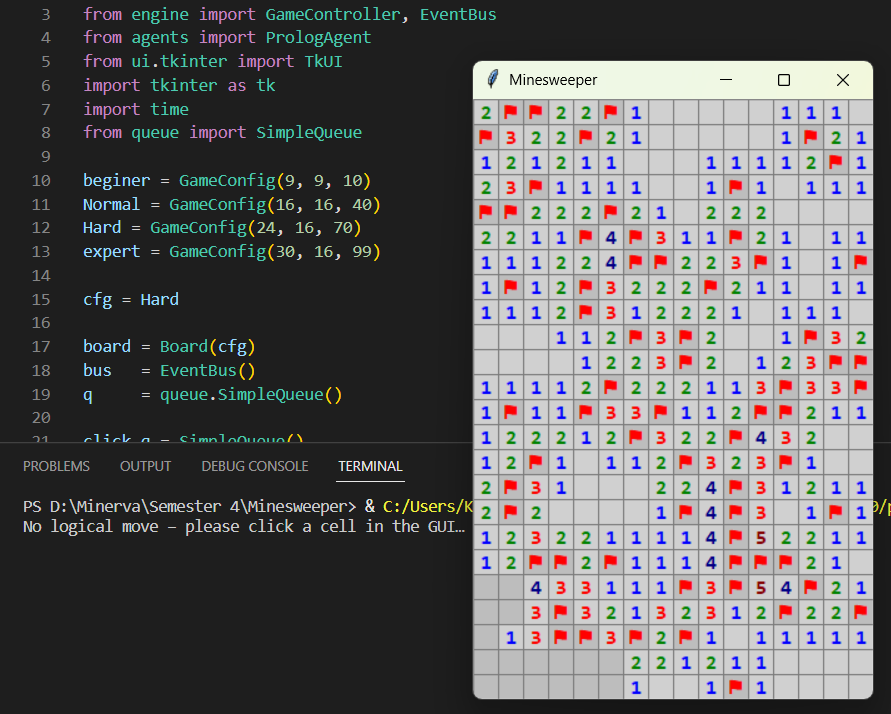

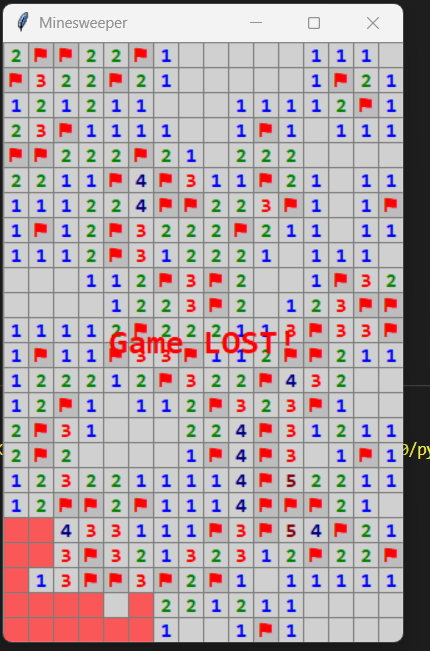

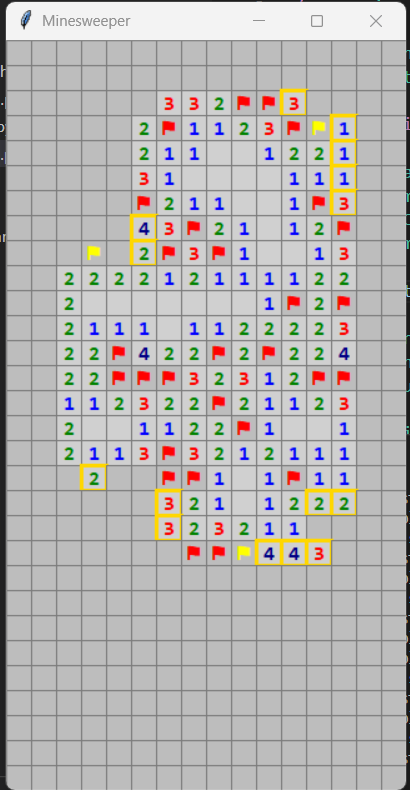

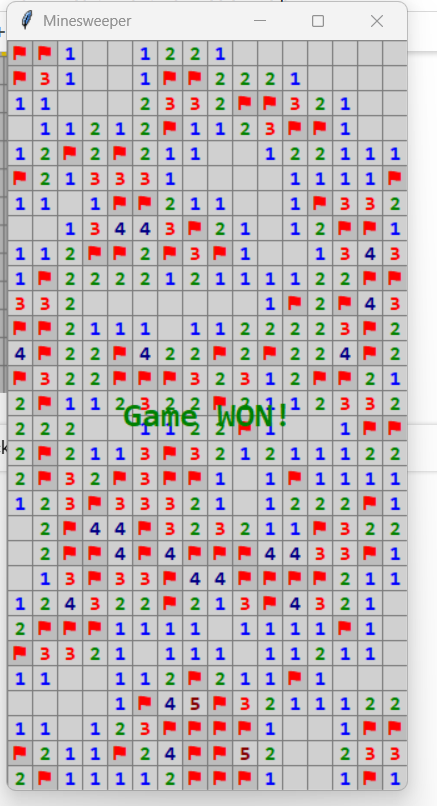